In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
# 데이터 로드 및 전처리 함수 정의
def load_and_preprocess_data(filepath):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(filepath)

    # 'image' 컬럼에 있는 문자열을 파이썬 리스트로 변환합니다.
    df['image'] = df['image'].apply(eval)

    # 이미지 데이터를 NumPy 배열로 변환하고 정규화합니다.
    images = np.array(df['image'].tolist()).reshape(-1, 26, 34, 1) / 255.0

    # 데이터 타입을 float32로 변환합니다.
    images = images.astype('float32')

    # 레이블 데이터를 가져옵니다.
    labels = df['state'].values

    return images, labels

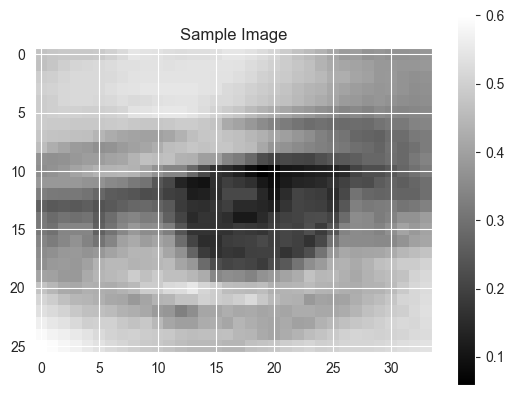

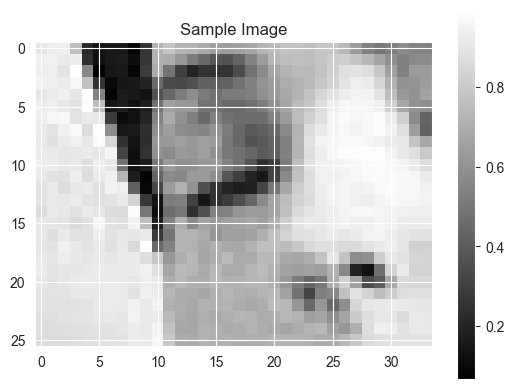

In [23]:
# 데이터 로드
X, y = load_and_preprocess_data('dataset/dataset.csv')

# 학습 및 검증 세트로 분할
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

# 첫 번째 이미지를 시각화합니다.
plt.imshow(x_train[0].reshape(26, 34), cmap='gray')
plt.colorbar()
plt.title('Sample Image')
plt.show()

In [24]:
# 데이터 형태 및 타입 출력
print(f'Train images shape: {x_train.shape}, Train labels shape: {y_train.shape}')
print(f'Validation images shape: {x_val.shape}, Validation labels shape: {y_val.shape}')
print(f'Types: {type(X)}, {type(y)}, {type(x_train[0])}')

Train images shape: (2586, 26, 34, 1), Train labels shape: (2586,)
Validation images shape: (288, 26, 34, 1), Validation labels shape: (288,)
Types: <class 'numpy.ndarray'>, <class 'numpy.ndarray'>, <class 'numpy.ndarray'>


In [25]:
# 데이터 검증
assert x_train.shape[0] == y_train.shape[0], "Training set images and labels count mismatch!"
assert x_val.shape[0] == y_val.shape[0], "Validation set images and labels count mismatch!"

In [26]:
# 데이터를 저장합니다.
np.savez('./dataset.npz', X=X, y=y)